# Multi-dimensional Function Interpolation

Consider a 7-dimensional function that predicts the circular motion of a piston within a cylinder:

$$
\begin{split}
C(\boldsymbol{x}) & = 2\pi \left( \frac{M}{k + S^2 \frac{P_0 V_0}{T_0} \frac{T_0}{V^2}} \right)^{0.5} \\
V(\boldsymbol{x}) & = \frac{S}{2k} \left( \left( A^2 + 4k \frac{P_0 V_0}{T_0} T_a \right)^{0.5} - A \right) \\
A & = P_0 S + 19.62M - \frac{k V_0}{S}
\end{split} 
$$

where $\boldsymbol{x} = \{ M, S, V_0, k, P_0, T_a, T_0 \}$ with the following domain:

| No | Input | Description | Bound |
|--- | ----- | ----------- | :----: |
|1| $M$   | Piston weight         | [30, 60] |
|2| $S$   | Piston surface area   | [0.005, 0.020] |
|3| $V_0$ | Initial gas volume    | [0.002, 0.010] |
|4| $k$   | Spring coefficient    | [1000, 5000] |
|5| $P_0$ | Atmospheric pressure  | [90'000, 110'000] |
|6| $T_a$ | Ambient temperature   | [290, 296] |
|7| $T_0$ | Filling gas temperature | [340, 360] |

## Problem setup

Import all the required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import minterpy as mp

Define the piston motion function:

In [2]:
def calc_circ_motion(x):
    A = (x[:,4] * x[:,1] + 19.62 * x[:,0] - x[:,3] * x[:,2] / x[:,1])
    V = x[:,1] / 2 / x[:,2] * (np.sqrt(A**2 + 4 * x[:,3] * x[:,4] / x[:,6] * x[:,5]) - A)
    C = 2 * np.pi * np.sqrt(x[:,0] / (x[:,3] + x[:,1]**2 * x[:,3] * x[:,4] / x[:,6] * x[:,6] / V**2))
    return C

In [3]:
def transform_input(x):
    x_t = np.copy(x)
    x_t[:,0] = 30 + (60-30) * (x_t[:,0] + 1) / 2
    x_t[:,1] = 0.005 + (0.020 - 0.005) * (x_t[:,1] + 1) / 2
    x_t[:,2] = 0.002 + (0.002 - 0.010) * (x_t[:,2] + 1) / 2
    x_t[:,3] = 1e3 + (5e3 - 1e3) * (x_t[:,3] + 1) / 2
    x_t[:,4] = 9e4 + (11e4 - 9e4) * (x_t[:,4] + 1) / 2
    x_t[:,5] = 290 + (296-290) * (x_t[:,5] + 1) / 2
    x_t[:,6] = 340 + (360-340) * (x_t[:,6] + 1) / 2
    
    return x_t

Evaluate the function on some large set of sample points:

In [4]:
x = -1 + 2 * np.random.rand(1000000,7)
b = transform_input(x)
y = calc_circ_motion(b)

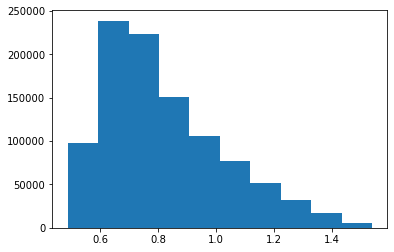

In [5]:
plt.hist(y);